<a href="https://colab.research.google.com/github/LTRibeiros/AnaliseDeDados_Python/blob/main/teste_2amostras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [8]:
enem_sp = pd.read_csv('/content/drive/MyDrive/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Objetivo:
Analisar a diferença entre as médias de mulheres e homens para a nota de um dos componentes de redação do colégio x.






In [10]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [11]:
colegiox.shape

(41, 28)

In [12]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [13]:
colegiox_mulher = colegiox.loc[colegiox.SEXO == 'F']

In [ ]:
colegiox_mulher.head()

In [ ]:
colegiox_mulher.shape

In [14]:
colegiox_homem = colegiox.loc[colegiox.SEXO == 'M']

In [ ]:
colegiox_homem.shape

In [ ]:
colegiox_homem.head()

1) Analisar a classificação das variáveis

In [15]:
colegiox.dtypes

,0
NU_INSCRICAO,object
NO_MUNICIPIO_RESIDENCIA,object
IDADE,int64
SEXO,object
TP_ESTADO_CIVIL,int64
RACA,object
TP_NACIONALIDADE,int64
TP_ST_CONCLUSAO,int64
ESCOLA,object
CO_ESCOLA,float64


2) Analisar valores missing

In [16]:
colegiox.isnull().sum()

,0
NU_INSCRICAO,0
NO_MUNICIPIO_RESIDENCIA,0
IDADE,0
SEXO,0
TP_ESTADO_CIVIL,0
RACA,0
TP_NACIONALIDADE,0
TP_ST_CONCLUSAO,0
ESCOLA,0
CO_ESCOLA,0


3) Analisar outliers

In [17]:
import plotly.express as px

In [40]:
grafico = px.box(colegiox_mulher, y="COMP5")
grafico.show()

In [39]:
grafico = px.box(colegiox_homem, y="COMP5")
grafico.show()

4) Analisar Normalidade

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [20]:
import scipy.stats as stats

In [21]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_mulher.COMP5)

ShapiroResult(statistic=np.float64(0.952120722128433), pvalue=np.float64(0.22389914877149802))

In [22]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox_homem.COMP5)

ShapiroResult(statistic=np.float64(0.9423077907693187), pvalue=np.float64(0.4874732021763525))

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt

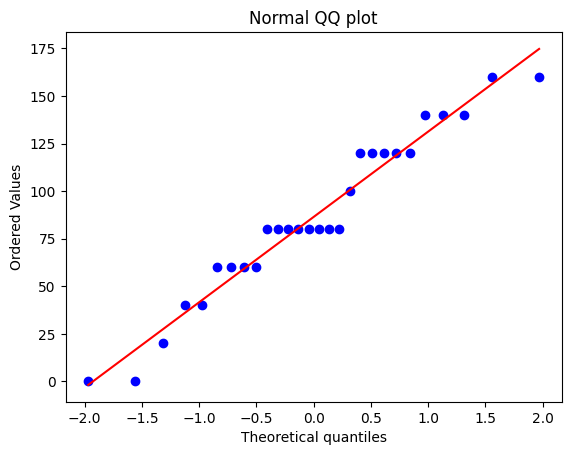

In [24]:
stats.probplot(colegiox_mulher['COMP5'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

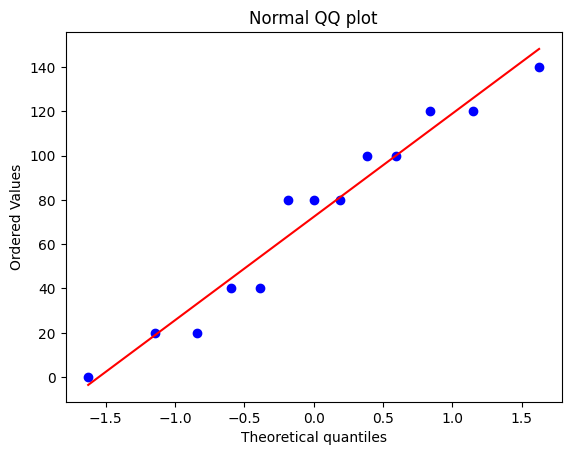

In [25]:
stats.probplot(colegiox_homem['COMP5'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**TESTE t-student**

Comparação das Médias das notas dos componentes 5 da redação do colégio Y.

Ho = NÃO HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES : p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS MÉDIAS DOS COMPONENTES : p <= 0.05

In [26]:
import scipy.stats as stats

In [27]:
colegiox_mulher.COMP5.mean()

np.float64(86.42857142857143)

In [28]:
colegiox_mulher.COMP5.std()

43.90345348048634

In [29]:
colegiox_homem.COMP5.mean()

np.float64(72.3076923076923)

In [30]:
colegiox_homem.COMP5.std()

44.37601569801833

In [31]:
stat, p = stats.ttest_ind(colegiox_homem.COMP5, colegiox_mulher.COMP5, equal_var=False)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: -0.95
p-valor: 0.3512173126


**INTERPRETAÇÃO:**

Teste estatístico: -0,95

p_valor = 0,35

Conclusão: Estatisticamente, com nível de significância de 5%, não se pode concluir que a média do componente 5 de redação do colegio X seja diferente entre homens e mulheres.



**Caso fosse o teste Z, o código seria o seguinte:**

**TESTE Z para duas amostras independentes**

Comparação das Médias das notas do componente 5 da redação entre homens e mulheres do colégio X.

Ho = NÃO HÁ DIFERENÇA ENTRE AS MÉDIAS ENTRE HOMENS E MULHERES : p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS MÉDIAS ENTRE HOMENS E MULHERES : p <= 0.05

In [32]:
from statsmodels.stats.weightstats import ztest

In [33]:
stat, p = ztest(colegiox_mulher.COMP5, colegiox_homem.COMP5)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 0.96
p-valor: 0.3394918950042334


In [34]:
colegiox_mulher.COMP5.describe()

,COMP5
count,28.000000
mean,86.428571
std,43.903453
min,0.000000
25%,60.000000
50%,80.000000
75%,120.000000
max,160.000000


In [35]:
colegiox_homem.COMP5.describe()

,COMP5
count,13.000000
mean,72.307692
std,44.376016
min,0.000000
25%,40.000000
50%,80.000000
75%,100.000000
max,140.000000
